# 平均報酬におけるUCRL2アルゴリズム

参考：
* [Near-optimal Regret Bounds for Reinforcement Learning](https://www.jmlr.org/papers/volume11/jaksch10a/jaksch10a.pdf)
* [Bandit Algorithms](https://tor-lattimore.com/downloads/book/book.pdf)の38章

今回は平均報酬でMinimax regretを達成するアルゴリズムを学びます．

**注意: 今回はSpanの情報などは必要ありません．しかし，半径に依存したバウンドになります．**

表記：

* MDP：$M=(\mathcal{S}, \mathcal{A}, P, r, \mu)$
* 平均報酬（ゲイン）：$\rho_s^\pi=\lim _{n \rightarrow \infty} \frac{1}{n} \sum_{t=1}^n \mathbb{E}^\pi\left[r_{A_t}\left(S_t\right) \mid S_1=s\right]$,
    * この平均は存在するとは限りません．なので，次のlimsupを考える場合があります．これは必ず存在します．$\bar{\rho}_s^\pi=\limsup _{n \rightarrow \infty} \frac{1}{n} \sum_{t=1}^n \mathbb{E}^\pi\left[r_{A_t}\left(S_t\right) \mid S_1=s\right]$
    * 最適ゲイン：$\rho^*=\max _{s \in \mathcal{S}} \sup _\pi \bar{\rho}_s^\pi$
    * Communicatingではない場合，最適ゲインが定数ではない場合があります．
    * メモリーレス方策$\pi$のゲインは次を満たします．$\rho^\pi=\lim _{n \rightarrow \infty} \frac{1}{n} \sum_{t=1}^n P_\pi^{t-1} r_\pi=P_\pi^* r_\pi$．ここで，$P_\pi^*=\lim _{n \rightarrow \infty} \frac{1}{n} \sum_{t=1}^n P_\pi^{t-1}$は定常遷移行列です．
* $v_\pi^{(k)}=\sum_{t=1}^k P_\pi^{t-1}\left(r_\pi-\rho^\pi\right)$を，$k$ステップ目までの過剰報酬とします．
    * （差分）価値関数は$v_\pi=\lim _{n \rightarrow \infty} \frac{1}{n} \sum_{k=1}^n v_\pi^{(k)}=\left(\left(I-P_\pi+P_\pi^*\right)^{-1}-P_\pi^*\right) r_\pi$で定義されます．
    * ちなみに任意のメモリーレス方策について，$\rho^\pi+v_\pi=r_\pi+P_\pi v_\pi$が成立します．
* スパン：$\operatorname{span}(v)=\max _{s \in \mathcal{S}} v(s)-\min _{s \in \mathcal{S}} v(s)$
* MDPの半径：$D(M)=\max _{s \neq s^{\prime}} \min _{\pi \in \Pi_{\mathrm{DM}}} \mathbb{E}^\pi\left[\min \left\{t \geq 1: S_t=s\right\} \mid S_1=s^{\prime}\right]-1$
    * 有限な半径のMDPを特にCommunicatingと呼びます．これはCommunicatingであることの必要十分条件です．（Exercise参照）
    * このとき，最適な平均報酬は状態に依存しません：$\rho^*(M):=\rho^*(M, s):=\max _\pi \rho(M, \pi, s)$.
    * 半径は必ず$\log _A(S)-3$以上になります．

### ベルマン方程式について

* 貪欲方策：$\pi_v(s)=\operatorname{argmax}_{a \in \mathcal{A}} r_a(s)+\left\langle P_a(s), v\right\rangle$
* ベルマン最適方程式：$\rho+v(s)=\max _{a \in \mathcal{A}}\left(r_a(s)+\left\langle P_a(s), v\right\rangle\right) \quad$ for all $s \in \mathcal{S}$

次が成立します．

---

* $(\rho, v)$がベルマン最適方程式を満たす場合，$\rho=\rho^*$ かつ $\pi_v$が最適方策になります．
* 決定的かつメモリーレスな最適方策が存在します．

**証明**

$(\rho, v)$をベルマン最適方程式を満たすとします．また，$\pi^*=\pi_v$を$v$についての貪欲方策とします．
このとき，

$$
\rho^{\pi^*}=\lim _{n \rightarrow \infty} \frac{1}{n} \sum_{t=1}^n P_{\pi^*}^{t-1} r_{\pi^*}=\lim _{n \rightarrow \infty} \frac{1}{n} \sum_{t=1}^n P_{\pi^*}^{t-1}\left(\rho \mathbf{1}+v-P_{\pi^*} v\right)=\rho \mathbf{1} .
$$



---


## UCRL2アルゴリズム

![UCRL2](figs/UCRL2.png)

UCRL2アルゴリズムではExtended value iterationアルゴリズムを走らせるので，先にこちらを紹介します．

### Extended Value Iterationアルゴリズム

* $u_i(s)$を$i$イテレーション目の状態の価値とします．
* $u'_i(s)$をnormalizeされた価値とします

Extended value iterationは次を繰り返します．

$$
\begin{aligned}
u_0(s) & =0, \\
u_{i+1}(s) & =\max _{a \in \mathcal{A}}\left\{\tilde{r}_k(s, a)+\max _{p(\cdot) \in \mathcal{P}(s, a)}\left\{\sum_{s^{\prime} \in \mathcal{S}} p\left(s^{\prime}\right) \cdot u_i\left(s^{\prime}\right)\right\}\right\}
\end{aligned}
$$

ここで，$\tilde{r}_k$は下の集合の内最大のもの，$\mathcal{P}$は下の集合そのものを表します．
$$
\begin{aligned}
\left|\tilde{r}(s, a)-\hat{r}_k(s, a)\right| & \leq \sqrt{\frac{7 \log \left(2 S A t_k / \delta\right)}{2 \max \left\{1, N_k(s, a)\right\}}} \\
\left\|\tilde{p}(\cdot \mid s, a)-\hat{p}_k(\cdot \mid s, a)\right\|_1 & \leq \sqrt{\frac{14 S \log \left(2 A t_k / \delta\right)}{\max \left\{1, N_k(s, a)\right\}}} .
\end{aligned}
$$

$\max_p$は線形計画法で解くことができます．実際，これは$s, a$-rectangularなRMDPの逆版なので，次を解けばできます：

$$
\begin{aligned}
&\max _{p, t \in \mathbb{R}^{S+S}}\sum_{s^{\prime} \in \mathcal{S}} p\left(s^{\prime}\right) \cdot u_i\left(s^{\prime}\right)\\
\text{ such that }
&p(s') - t(s') \leq \hat{p}_k(s'\mid s, a)\\
&-p(s') - t(s') \leq -\hat{p}_k(s'\mid s, a) \\
&\boldsymbol{e}_S^\top t \leq \beta \\
&t \geq 0 \\
&\boldsymbol{e}_S^\top p = 1,\; p \geq 0
\end{aligned}
$$

この価値反復法は
$$
\max _{s \in S}\left\{u_{i+1}(s)-u_i(s)\right\}-\min _{s \in S}\left\{u_{i+1}(s)-u_i(s)\right\}<\frac{1}{\sqrt{t_k}}
$$
で停止します．

### Extended Value Iterationの性質

---

次が成立します：

$$
\max _s u_i(s)-\min _s u_i(s) \leq D
$$

**証明**

まず，$u_i(s)$は$\tilde{M}^+$において，状態$s$から始まる累積期待報酬和であることを思い出しましょう．


## UCRL2の解析

UCRL2のリグレットを導出します．
$k$エピソード目のリグレットを

$$
\Delta_k:=\sum_{s, a} \nu_k(s, a)\left(\rho^*-\bar{r}(s, a)\right)
$$

として定義しましょう．ここで，$\nu_k$はエピソード内で$(s, a)$を訪れた回数です．

---

このとき，次が高確率で成立します．

$$
\sum_k \Delta_k+\sqrt{\frac{5}{2} T \log \left(\frac{8 T}{\delta}\right)}
$$

**証明**

Hoeffdingの不等式から，$T$ステップ間の状態行動のカウント$N(s, a)$に対して，
$$
\mathbb{P}\left\{\left.\sum_{t=1}^T r_t \leq \sum_{s, a} N(s, a) \bar{r}(s, a)-\sqrt{\frac{5}{8} T \log \left(\frac{8 T}{\delta}\right)} \right\rvert\,(N(s, a))_{s, a}\right\} \leq\left(\frac{\delta}{8 T}\right)^{5 / 4}<\frac{\delta}{12 T^{5 / 4}}
$$

が成立します（5は多分$T^{5/4}$でlog取ったら出てくる）．
よって，
$$
\Delta\left(s_1, T\right)=T \rho^*-\sum_{t=1}^T r_t<T \rho^*-\sum_{s, a} N(s, a) \bar{r}(s, a)+\sqrt{\frac{5}{8} T \log \left(\frac{8 T}{\delta}\right)}
$$
が確率$1-\frac{\delta}{12 T^{5 / 4}}$以上で成立します．
後は書き直せば終わりです．

---



期待リグレットを出す場合は真のMDPが$\mathfrak{M}$に入っていない場合のリグレットを出す必要がありますが，面倒なので省略します．

### $M \in \mathfrak{M}_k$の場合のリグレット　

Optimismは後で示します．
先にOptimismが成立している場合のリグレットを出してしまいましょう．
まず，Extended Value Iterationの仕組みから，

$$
\tilde{\rho}_k \geq \rho^*-\frac{1}{\sqrt{t_k}}
$$

が成立します．よって，
$$
\Delta_k \leq \sum_{s, a} v_k(s, a)\left(\rho^*-\bar{r}(s, a)\right) \leq \sum_{s, a} v_k(s, a)\left(\tilde{\rho}_k-\bar{r}(s, a)\right)+\sum_{s, a} \frac{v_k(s, a)}{\sqrt{t_k}}
$$

が成り立ちます．


## 実験

UCRL2を実装してみましょう．
[Achieving Tractable Minimax Optimal Regret in Average Reward MDPs](https://arxiv.org/abs/2406.01234) のriver swim環境で挙動を見ます．

In [1]:
import numpy as np
import jax.numpy as jnp
from jax.random import PRNGKey
import jax
from typing import NamedTuple, Optional

key = PRNGKey(0)

S = 3  # 状態集合のサイズ
A = 2  # 行動集合のサイズ．LEFTが0, RIGHTが1とします
S_set = jnp.arange(S)  # 状態集合
A_set = jnp.arange(A)  # 行動集合


# 報酬行列（論文中では確率的ですが，今回は面倒なので決定的にします）
rew = np.zeros((S, A))
rew[0, 0] = 0.05
rew[-1, 1] = 0.95
rew = jnp.array(rew)
assert rew.shape == (S, A)


# 遷移確率行列
P = np.zeros((S, A, S))
for s in range(1, S-1):
    P[s, 0, s-1] = 1  # LEFT
    P[s, 1, s-1] = 0.05  # RIGHT
    P[s, 1, s] = 0.6  # RIGHT
    P[s, 1, s+1] = 0.35  # RIGHT

# at s1
P[0, 0, 0] = 1  # LEFT
P[0, 1, 0] = 0.6  # RIGHT
P[0, 1, 1] = 0.4  # RIGHT
P[-1, 0, -2] = 1  # LEFT
P[-1, 1, -2] = 0.05  # RIGHT
P[-1, 1, -1] = 0.95  # RIGHT

P = P.reshape(S, A, S)
P = jnp.array(P)
np.testing.assert_allclose(P.sum(axis=-1), 1, atol=1e-6)  # ちゃんと確率行列になっているか確認します

class MDP(NamedTuple):
    S_set: jnp.array  # 状態集合
    A_set: jnp.array  # 行動集合
    rew: jnp.array  # 報酬行列
    P: jnp.array  # 遷移確率行列

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_set)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_set)


mdp = MDP(S_set, A_set, rew, P)

print("状態数：", mdp.S)
print("行動数：", mdp.A)

状態数： 3
行動数： 2


In [2]:
from scipy.optimize import linprog
import numpy as np


def solve_optimistic_PV(count_next_SAS: np.ndarray, mdp: MDP, V: np.ndarray, tk: int, delta: float):
    def bonus(count_next_S: np.ndarray):
        # 論文のパラメータはちょっといじります
        return np.sqrt(np.log(2 * mdp.A * tk / delta) / np.maximum(1, count_next_S.sum()))
        # return np.sqrt(14*mdp.S*np.log(2 * mdp.A * tk / delta) / np.maximum(1, count_next_S.sum()))

    def solve_per_sa(count_next_S):
        est_P_sa = count_next_S / np.maximum(1, count_next_S.sum())

        c = np.hstack([-V, np.zeros(S)])  # maximize PV
        A_ub = np.hstack([np.eye(mdp.S), -np.eye(mdp.S)])
        nA_ub = np.hstack([-np.eye(mdp.S), -np.eye(mdp.S)])
        tA_ub = np.hstack([np.zeros(mdp.S), np.ones(mdp.S)])
        A_ub = np.vstack([A_ub, nA_ub, tA_ub])
        b_ub = np.hstack([est_P_sa, -est_P_sa, np.array([bonus(count_next_S)])])

        A_eq = np.hstack([np.ones(mdp.S), np.zeros(mdp.S)]).reshape(1, -1)  # 総和が1になる制約
        b_eq = np.array([1.0])  # 総和は1
        res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=(0, None)) 
        return -res.fun

    PV = np.zeros((mdp.S, mdp.A))
    for s in range(mdp.S):
        for a in range(mdp.A):
            count_next_S = count_next_SAS[s, a]
            PV[s, a] = solve_per_sa(count_next_S)
    return jnp.array(PV)
    

ref_state = 0 

def ExtendedValueIteration(count_SAS: jnp.ndarray, mdp: MDP, tk: int, delta: float = 0.9, tol: float = 1e-5) -> jnp.array:
    def condition_fun(nQ_Q):
        nQ, Q = nQ_Q
        nbias = nQ.max(axis=1)  # S -> R
        bias = Q.max(axis=1)  # S -> R
        span_diff = (nbias - bias).max()
        return span_diff > tol

    def body_fun(nQ_Q):
        Q, _ = nQ_Q
        next_v = solve_optimistic_PV(count_SAS, mdp=mdp, V=Q.max(axis=1), tk=tk, delta=delta)
        gain = Q[ref_state].max()
        nQ = mdp.rew + next_v - gain
        return (nQ, Q)

    init_Q = jnp.zeros((mdp.S, mdp.A))
    nQ_Q = (init_Q, init_Q)
    nQ_Q = body_fun(nQ_Q)
    while condition_fun(nQ_Q):
        nQ_Q = body_fun(nQ_Q)
    return nQ_Q[0]


In [3]:
# test
count_SAS = np.zeros((mdp.S, mdp.A, mdp.S)) 
count_SAS[1, 0] = 500
V = np.array([0.2, 1.0, 3.0])
solve_optimistic_PV(count_SAS, mdp=mdp, V=V, tk=10, delta=0.1)

Array([[3.       , 3.       ],
       [1.4884808, 3.       ],
       [3.       , 3.       ]], dtype=float32)

In [4]:
import random

def sample_next_state(mdp: MDP, s: int, a: int):
    """ sample next state according to the transition matrix P
    Args:
        mdp: MDP
        s: int
        a: int
    Returns:
        next_s: int
    """
    probs = np.array(mdp.P[s, a])
    return np.random.choice(mdp.S_set, p=probs)


def sample_eps_greedy_act(mdp: MDP, q_s: np.array, eps: float):
    if random.random() < eps:
        return random.randint(0, mdp.A-1)
    else:
        return q_s.argmax()

In [5]:
# 最適ゲインを評価する用

@jax.jit
def compute_optimal_gain(mdp: MDP, tol: float = 1e-6) -> jnp.array:
    ref_state = 0 
    def condition_fun(nV_V):
        nV, V = nV_V
        span_diff = (nV - V).max()
        return span_diff > tol

    def body_fun(nV_V):
        V, _ = nV_V
        gain = V[ref_state]
        next_v = mdp.P @ V
        nV = (mdp.rew + next_v).max(axis=1) - gain
        return (nV, V)

    init_V = jnp.zeros((mdp.S))
    nV_V = body_fun((init_V, init_V))
    V, _ = jax.lax.while_loop(condition_fun, body_fun, nV_V)
    return V[ref_state]

optimal_gain = compute_optimal_gain(mdp)

In [6]:
from tqdm import tqdm

K = 32
init_s = 0
t = 1

s = init_s
count_SAS = np.zeros((S, A, S))
total_rew = 0
regrets = []

for epi in tqdm(range(K)):
    epi_count_SAS = np.zeros((S, A, S))
    Q = ExtendedValueIteration(count_SAS, mdp, t)

    # 探索をします　
    while True:
        a = sample_eps_greedy_act(mdp, Q[s], 0)
        total_rew += mdp.rew[s, a]
        if epi_count_SAS[s, a].sum() >= max(1, count_SAS[s, a].sum()):
            break
        next_s = sample_next_state(mdp, s, a)
        epi_count_SAS[s, a, next_s] += 1
        s = next_s
        t = t + 1

        # リグレットを計算します
        regret = t * optimal_gain - total_rew
        regrets.append(regret)

    count_SAS += epi_count_SAS

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [02:21<00:00,  4.41s/it]


[0.84650034 2.4759972  4.941755  ] 0.81846076


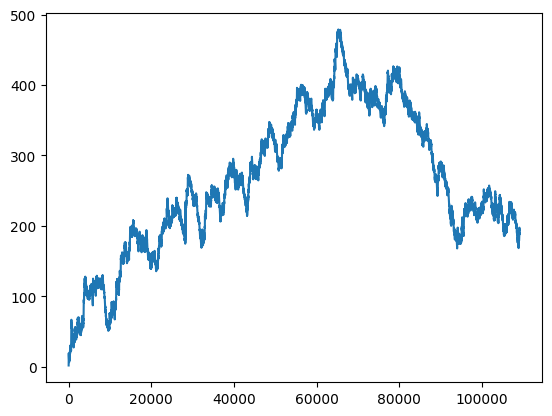

In [9]:
import matplotlib.pyplot as plt

print(Q.max(axis=-1), optimal_gain)
plt.plot(regrets)